Link Dataset : https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [ ]:
path = "gdrive/MyDrive/Dataset/"
os.listdir(path)

['Iris.csv',
 'credit_risk_dataset.csv',
 'UCMerced_LandUse.zip',
 'NEU surface defect database.rar',
 'train_titanic.tsv',
 'test_titanic.tsv',
 'loan_final.csv']

In [ ]:
data=pd.read_csv(path+'train_titanic.tsv', sep = '\t')

In [ ]:
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

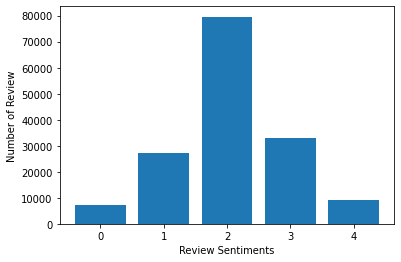

In [ ]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')

plt.ylabel('Number of Review')
plt.show()

**TF-IDF**

In [ ]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

**Multinominal Bayes**

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Multinominal Bayes")
print(classification_report(y_test, predicted))

Multinominal Bayes
              precision    recall  f1-score   support

           0       0.60      0.03      0.06      2110
           1       0.51      0.25      0.33      8081
           2       0.60      0.90      0.72     23920
           3       0.53      0.38      0.45      9929
           4       0.60      0.05      0.09      2778

    accuracy                           0.59     46818
   macro avg       0.57      0.32      0.33     46818
weighted avg       0.57      0.59      0.53     46818



**Multi Linear Regression**

In [ ]:
mlr = LogisticRegression(random_state = 123, multi_class='multinomial', penalty='none').fit(X_train, y_train)
predicted = mlr.predict(X_test)
print("Multi Linear Regression")
print(classification_report(y_test, predicted))

Multi Linear Regression
              precision    recall  f1-score   support

           0       0.47      0.29      0.36      2110
           1       0.51      0.43      0.47      8081
           2       0.71      0.80      0.75     23920
           3       0.53      0.53      0.53      9929
           4       0.49      0.37      0.42      2778

    accuracy                           0.63     46818
   macro avg       0.54      0.48      0.51     46818
weighted avg       0.62      0.63      0.62     46818



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
